In [1]:
# Imporing libabries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing rbl data set
df = pd.read_csv('./stock_data/RBLBANK.csv',parse_dates=['Date']).set_index('Date')
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,RBLBANK,EQ,556.55,557.50,564.9,551.1,564.25,563.90,560.31,888219,4.976749e+08,17580,387382,43.61
2017-05-16,RBLBANK,EQ,563.90,564.80,567.7,559.0,561.60,562.60,562.26,495571,2.786409e+08,8172,203735,41.11
2017-05-17,RBLBANK,EQ,562.60,563.00,569.9,558.0,564.70,564.25,563.94,831318,4.688176e+08,13860,253851,30.54
2017-05-18,RBLBANK,EQ,564.25,559.80,563.0,551.0,553.50,552.15,555.33,1050920,5.836120e+08,27124,615645,58.58
2017-05-19,RBLBANK,EQ,552.15,560.95,567.0,551.4,553.80,555.45,558.44,1292735,7.219101e+08,39632,569809,44.08


In [3]:
# Filling NULL values
df['Daily_return'] = (df['Close Price']).pct_change()
df['Daily_return'] = df['Daily_return'].replace([np.inf, -np.inf],np.nan)
df.dropna(inplace = True)
df['Daily_return'].isnull().sum()

0

In [4]:
# Daily mean of RBL
avg_daily_mean = df['Daily_return'].mean()
daily_mean = round(avg_daily_mean * 100, 2)
daily_mean

0.05

In [5]:
# Daily standard deviation of RBL
std_daily_mean = df['Daily_return'].std()
daily_std = round(std_daily_mean* 100, 2)
daily_std

1.63

In [6]:
# Annual mean and standard deviation of RBL
annual_mean = avg_daily_mean * 252
annual_stddev = std_daily_mean * math.sqrt(252)
round(annual_mean* 100, 2), round(annual_stddev* 100, 2)

(11.35, 25.87)

In [7]:
def volatality_return(df):
    df['Log_Ret'] = np.log(df['Close Price'] / df['Close Price'].shift(1))
    df['Volatility'] = df['Log_Ret'].rolling(window=252).std() * np.sqrt(252)
    pass

# Importing data from multiple sectors
* It - Mindtree
* Textiles - Raymond
* Bank - RBl Bank
* Entertainment - PVR
* Suzlon - Energy

In [8]:
# It - mindtree
MINDTREE = pd.read_csv('./stock_data/MINDTREE.csv')

MINDTREE['Date']=MINDTREE['Date'].astype(dtype='datetime64')
MINDTREE=MINDTREE[MINDTREE['Series']=='EQ']
MINDTREE.drop(['Series'],axis=1,inplace=True)

MINDTREE.head()

,Symbol,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MINDTREE,2017-05-15,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90
1,MINDTREE,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65
2,MINDTREE,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35
3,MINDTREE,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05
4,MINDTREE,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42


In [9]:
# Textiles - raymond
RAYMOND = pd.read_csv('./stock_data/RAYMOND.csv')

RAYMOND['Date']=RAYMOND['Date'].astype(dtype='datetime64')
RAYMOND=RAYMOND[RAYMOND['Series']=='EQ']
RAYMOND.drop(['Series'],axis=1,inplace=True)

RAYMOND.head()

,Symbol,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RAYMOND,2017-05-15,763.45,765.00,779.00,757.05,773.9,772.80,770.09,292498,2.252491e+08,9033,55467,18.96
1,RAYMOND,2017-05-16,772.80,773.45,801.45,768.10,783.5,785.00,788.89,823956,6.500070e+08,18238,179377,21.77
2,RAYMOND,2017-05-17,785.00,786.00,804.95,778.40,785.5,783.65,792.72,598094,4.741212e+08,13968,127637,21.34
3,RAYMOND,2017-05-18,783.65,779.35,779.95,740.20,744.0,746.95,762.57,319834,2.438956e+08,7713,92200,28.83
4,RAYMOND,2017-05-19,746.95,748.00,767.50,714.00,722.0,723.10,740.30,561346,4.155619e+08,13328,137648,24.52


In [10]:
# Bank - RBl Bank
RBL = pd.read_csv('./stock_data/RBLBANK.csv')

RBL['Date']=RBL['Date'].astype(dtype='datetime64')
RBL=RBL[RBL['Series']=='EQ']
RBL.drop(['Series'],axis=1,inplace=True)

RBL.head()

,Symbol,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RBLBANK,2017-05-15,556.55,557.50,564.9,551.1,564.25,563.90,560.31,888219,4.976749e+08,17580,387382,43.61
1,RBLBANK,2017-05-16,563.90,564.80,567.7,559.0,561.60,562.60,562.26,495571,2.786409e+08,8172,203735,41.11
2,RBLBANK,2017-05-17,562.60,563.00,569.9,558.0,564.70,564.25,563.94,831318,4.688176e+08,13860,253851,30.54
3,RBLBANK,2017-05-18,564.25,559.80,563.0,551.0,553.50,552.15,555.33,1050920,5.836120e+08,27124,615645,58.58
4,RBLBANK,2017-05-19,552.15,560.95,567.0,551.4,553.80,555.45,558.44,1292735,7.219101e+08,39632,569809,44.08


In [11]:
# Entertainment - pvr
PVR = pd.read_csv('./stock_data/PVR.csv')

PVR['Date']=PVR['Date'].astype(dtype='datetime64')
PVR=PVR[PVR['Series']=='EQ']
PVR.drop(['Series'],axis=1,inplace=True)

PVR.head()

,Symbol,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PVR,2017-05-15,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58
1,PVR,2017-05-16,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09
2,PVR,2017-05-17,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83
3,PVR,2017-05-18,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24
4,PVR,2017-05-19,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67


In [12]:
# Suzlon - energy
SUZLON = pd.read_csv('./stock_data/SUZLON.csv')

SUZLON['Date']=SUZLON['Date'].astype(dtype='datetime64')
SUZLON=SUZLON[SUZLON['Series']=='EQ']
SUZLON.drop(['Series'],axis=1,inplace=True)

SUZLON.head()

,Symbol,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,SUZLON,2017-05-15,20.75,20.85,20.90,19.25,19.75,19.6,19.98,119371670,2.385262e+09,60296,41900872,35.10
1,SUZLON,2017-05-16,19.60,19.75,20.10,19.45,19.65,19.7,19.76,44577475,8.810392e+08,26573,12082938,27.11
2,SUZLON,2017-05-17,19.70,19.75,20.00,19.60,19.90,19.9,19.84,37090719,7.360387e+08,27347,10901257,29.39
3,SUZLON,2017-05-18,19.90,19.70,20.80,19.55,20.10,20.0,20.20,85301999,1.723070e+09,39877,23132614,27.12
4,SUZLON,2017-05-19,20.00,20.45,21.35,20.35,20.85,20.6,20.77,125514828,2.606911e+09,76680,33704388,26.85


In [13]:
# List of selected stocks 
li = ['mindtree','raymond','rblbank','pvr','suzlon']
li = [x.upper() for x in li]
li_csv = ['./stock_data/'+x+'.csv' for x in li]

In [14]:
# Data frame of selected stocks
def read_csv(filename):
    return pd.read_csv(filename, parse_dates=['Date'])['Close Price']

df = pd.DataFrame()

for fname in li_csv:
    df[fname.split('/')[-1][:-4]] = read_csv(fname)
df.head()

,MINDTREE,RAYMOND,RBLBANK,PVR,SUZLON
0,509.45,772.80,563.90,1524.95,19.6
1,511.30,785.00,562.60,1539.00,19.7
2,506.35,783.65,564.25,1530.30,19.9
3,492.90,746.95,552.15,1515.05,20.0
4,497.50,723.10,555.45,1513.55,20.6


In [15]:
# Creating equal weights
equal_weights = np.full(df.shape[1], 1/df.shape[1])
equal_weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [16]:
# Annual return on portfolio with equal weights
def portfolio_annual_returns(df, weights):
    return np.sum(df.pct_change().mean() * weights ) * 252  

round(portfolio_annual_returns(df, equal_weights), 2 )

0.04

In [17]:
# Covariance of the portfolio 
portfolio_covariance = df.pct_change().cov()
portfolio_covariance

,MINDTREE,RAYMOND,RBLBANK,PVR,SUZLON
MINDTREE,0.000463,0.000041,0.000053,0.000040,0.000065
RAYMOND,0.000041,0.000525,0.000125,0.000090,0.000265
RBLBANK,0.000053,0.000125,0.000266,0.000062,0.000178
PVR,0.000040,0.000090,0.000062,0.000382,0.000047
SUZLON,0.000065,0.000265,0.000178,0.000047,0.001398


In [18]:
# Annual voltatility
def portfolio_annual_volatility(portfolio, weights): 
    return np.sqrt(np.dot(weights.T, np.dot(df.pct_change().cov(), weights)) * np.sqrt(252))

round(portfolio_annual_volatility(df, equal_weights), 2)

0.06

In [19]:
# sharpe ratio of portfolio
def portfolio_sharpe(df, weights ): 
    return portfolio_annual_returns(df, weights ) / portfolio_annual_volatility(df, weights )

round(portfolio_sharpe(df, equal_weights), 2)

0.77

In [20]:

print("Portfolio Annualized Mean Return: ", round(portfolio_annual_returns(df, equal_weights), 2))
print("Portfolio Annualized Volatility:  ", round(portfolio_annual_volatility(df, equal_weights), 2))


Portfolio Annualized Mean Return:  0.04
Portfolio Annualized Volatility:   0.06


In [21]:
# Normalizing weights 
def normalize_weights(weights):
    for i in range(0,3):
        weights  = np.round(weights, 3) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(df.shape[1])
    return normalize_weights(weights)

random_weights()

array([0.28571429, 0.13986014, 0.25574426, 0.03096903, 0.28771229])

In [22]:
scatter_data = pd.DataFrame()
for i in range(0, 2500):
    weights    = random_weights()
    returns    = portfolio_annual_returns(df, weights )
    volatility = portfolio_annual_volatility(df, weights )
    sharpe     = returns / volatility
    scatter_data = scatter_data.append([{ "weights":    weights,
        "returns":    returns,
        "volatility": volatility,
        "sharpe":     sharpe }])

scatter_data.reset_index(inplace=True, drop=True)
scatter_data.head()


,weights,returns,volatility,sharpe
0,"[0.11511511511511512, 0.15715715715715717, 0.3...",0.039165,0.054032,0.724848
1,"[0.212, 0.207, 0.235, 0.04, 0.306]",-0.014522,0.066988,-0.216792
2,"[0.03, 0.438, 0.294, 0.125, 0.113]",0.036479,0.061294,0.595153
3,"[0.030969030969030965, 0.26873126873126874, 0....",-0.015326,0.060829,-0.251960
4,"[0.2487512487512487, 0.06393606393606394, 0.26...",0.064535,0.054316,1.188134


In [23]:
# Portfolio with highest sharpe ratio
point_max_sharpe = scatter_data.loc[scatter_data['sharpe'].idxmax()]
point_max_sharpe

weights       [0.481, 0.041, 0.247, 0.223, 0.008]
returns                                  0.240188
volatility                               0.053255
sharpe                                   4.510173
Name: 1275, dtype: object

In [24]:
point_max_sharpe['weights']

array([0.481, 0.041, 0.247, 0.223, 0.008])

In [25]:
# Portfolio with lowest volatility
point_min_volatility = scatter_data.loc[ scatter_data['volatility'].idxmin() ]
point_min_volatility

weights       [0.24775224775224777, 0.15584415584415587, 0.3...
returns                                                0.160751
volatility                                             0.048103
sharpe                                                 3.341801
Name: 2188, dtype: object

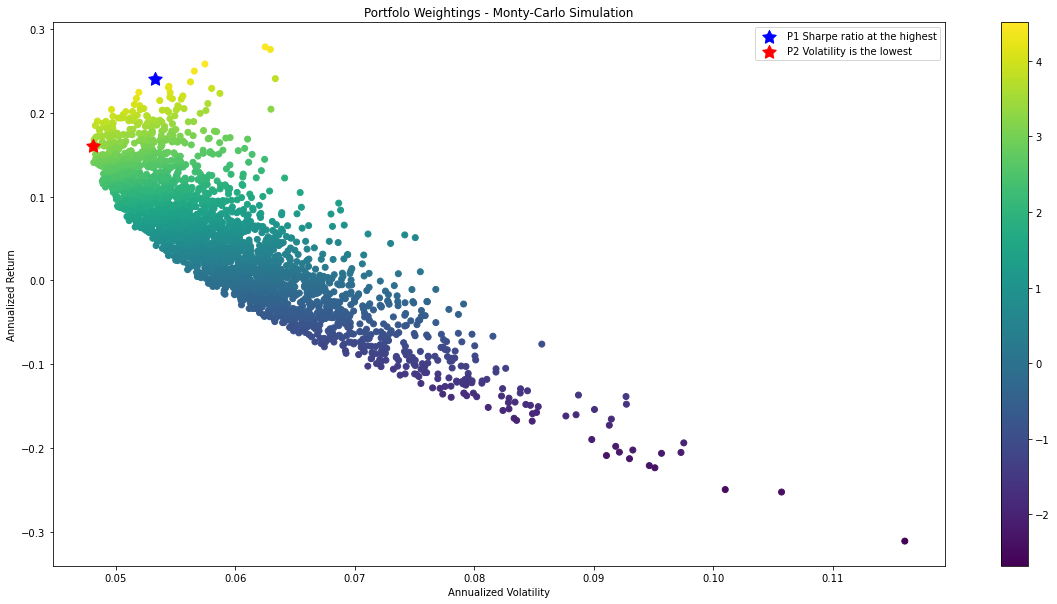

In [26]:
# Monty-Carlo Simulation1
fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=1)
plt.scatter( 
    scatter_data.volatility,     
    scatter_data.returns, 
    c = scatter_data.sharpe)
plt.title('Portfolo Weightings - Monty-Carlo Simulation')
plt.ylabel('Annualized Return')
plt.xlabel('Annualized Volatility')
plt.colorbar()

# Mark the 2 portfolios where
plt.scatter(point_max_sharpe.volatility, point_max_sharpe.returns, marker=(5,1,0), c='b', s=200, label = 'P1 Sharpe ratio at the highest')
plt.scatter(point_min_volatility.volatility, point_min_volatility.returns, marker=(5,1,0), c='r', s=200, label = 'P2 Volatility is the lowest')
plt.legend()
plt.show()